In [1]:
# https://discuss.pytorch.org/t/i-have-3-gpu-why-torch-cuda-device-count-only-return-1/7245/4
import torch
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

__Python VERSION: 3.8.3 (default, May 19 2020, 18:47:26) 
[GCC 7.3.0]
__pyTorch VERSION: 1.7.0
__CUDA VERSION
/usr/bin/sh: 1: nvcc: not found
__CUDNN VERSION: 8003
__Number CUDA Devices: 2
__Devices
Active CUDA Device: GPU 0
Available devices  2
Current cuda device  0


In [2]:
%load_ext autoreload
%autoreload 2

import os
import json
import main
from tqdm import tqdm
import numpy as np
from argparse import ArgumentDefaultsHelpFormatter, ArgumentParser
import matplotlib.pyplot as plt

In [3]:
# arguments
parser = ArgumentParser(formatter_class=ArgumentDefaultsHelpFormatter)
args = parser.parse_args('')

args.project_name = 'ContrastiveLearning-SET-Wildcard-Expand-Union-27'
args.data_path = '../Raw_Datasets/SET/WildCardSETidxUnion-3Attr-3Vals-8Pairs-0Train-5120Val-5120Test.json'
args.mode = 'test'
args.resume_checkpoint_dir = 'checkpoints/ContrastiveLearning-SET-Wildcard-Expand-Union-27/20210401-235947-Con;Vec20;L8H8Lk4Hk2;scheduledAdamW36000;16880.2Kparams_runId_1n9r52ul'
args.ckpt_name = 'last.ckpt'
args.runID = '1n9r52ul'
args.gpu = 1
args.approve_before_training = False
args.aml = False
args.dataset_name = None

In [4]:
trainmodule, game_datamodule = main.main(args)

Global seed set to 42


---------data----------
num_attributes : 3
num_attr_vals : 3
key_support_size : 27
N_pairs : 8
union_only : True
max_len_q : 16
len_k : 1
train_gt_idxs length : 0
val_gt_idxs length : 5120
test_gt_idxs length : 5120
train_tokens length : 0
val_tokens length : 5120
test_tokens length : 5120
test_marginal_gt_idxs length : 5120
test_marginal_tokens length : 5120
vocab_size : 74
symbol_vocab_token_lookup : {'(': 64, ')': 65, 'NULL': 66, 'SEP': 67, 'SOS': 68, 'EOS': 69, 'PAD': 70, 'PLH': 71, '|': 72, '!': 73}
vocab_by_property : False
-----------------------
----------hparams----------
seed : 42
batch_size : 1024
max_epochs : 20000000000
val_every_n_epoch : 200
d_model : 512
embed_dropout : 0.0
vec_repr : 20
model : contrastive
d_ff : 1024
N_enc : 8
num_heads : 8
N_enc_key : 4
num_heads_key : 2
attn_wt_tying_scheme : untie_QKVO
attn_wt_dropout : 0.0
heads_dropout : 0.0
pff_dropout : 0.0
representation_pos : 0
dotproduct_bottleneck : True
normalize_dotproduct : False
contrastive_use_infoNCE 

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 100%|██████████| 5/5 [00:04<00:00,  1.00s/it]{0.028041521087288857, 0.8852430582046509, 0.9964052438735962, 0.876325786113739, 0.9240771532058716, 0.996427059173584, 0.8413025736808777, 0.912308394908905, 7.900000095367432, 9.0, 10.988855361938477, 11.960627555847168, 12.95324993133545, 13.931884765625, 14.925860404968262, 15.920921325683594, 16.8763370513916, 10.0, 18.799604415893555, 19.76071548461914, 17.84121322631836, 21.811569213867188, 22.745651245117188, 23.864286422729492, 20.827289581298828, 24.799762725830078, 26.0, 27.0, 28.71451759338379, 0.0009432457736693323, 0.05754784867167473, 0.03703700006008148, 0.04446282982826233, 0.06153429299592972, 0.11038848012685776, 0.04871955141425133, 0.09016501158475876, 0.05139140412211418, 0.08234559744596481, 0.06554482132196426, 8.0, 8.100000381469727, 9.039999961853027, 10.013333320617676, 11.0, 11.988235473632812, 11.037233352661133, 12.952011108398438, 12.05741024017334, 12.929519653320312, 13.930282592773438, 13.993774414

## KL Loss Analysis

In [5]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(np.array(x) - np.max(x, axis=-1).reshape(-1, 1))
    return e_x / np.sum(e_x, axis=-1).reshape(-1, 1)

def entropy(x):
    return - np.sum(x * np.log2(x), axis=-1)

top 50th data indices by kl loss [3774 3543 1667  834 4453 3065  771 4930 2261 3565 2020 3184 2348 1194
 4784 1688 3645  243 3230  462    1 2288 2446 2790 4301 1970 3241 2842
 1780  182  987 1979 3561 3904 4588 3685 2670 2759  559 2858 2659    3
  560 4867  183 1545 2701 4219 4028 5004]


(array([3.223e+03, 9.980e+02, 5.110e+02, 2.390e+02, 8.800e+01, 3.900e+01,
        1.300e+01, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([4.20323377e-05, 2.69840650e-02, 5.39260977e-02, 8.08681303e-02,
        1.07810163e-01, 1.34752196e-01, 1.61694228e-01, 1.88636261e-01,
        2.15578294e-01, 2.42520326e-01, 2.69462359e-01]),
 <BarContainer object of 10 artists>)

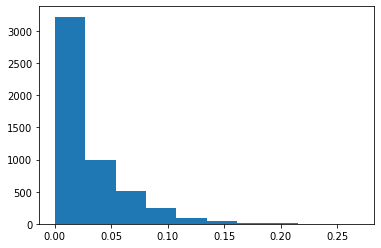

In [6]:
p = 'checkpoints/ContrastiveLearning-SET-Wildcard-Expand-Union-27/20210401-235947-Con;Vec20;L8H8Lk4Hk2;scheduledAdamW36000;16880.2Kparams_runId_1n9r52ul/test_metrics.json'
with open(p, 'r') as f:
    res = json.load(f)
    
full_kl_loss = [row for batch in res['full_kl_loss'] for row in batch]
full_logits = [row for batch in res['full_logits'] for row in batch]
full_probs = softmax(full_logits)


full_kl_loss_sum_row = np.sum(np.array(full_kl_loss), axis=-1)
sorted_indices = np.argsort(full_kl_loss_sum_row)
print('top 50th data indices by kl loss', sorted_indices[:50])

plt.hist(full_kl_loss_sum_row)

In [7]:
full_kl_loss_sum_row[sorted_indices]

array([4.20323377e-05, 4.34187077e-05, 4.34892654e-05, ...,
       2.17115864e-01, 2.19816827e-01, 2.69462359e-01])

In [8]:
game_data = main.load_data(args.data_path)
gt_counts = np.array([len(gt_idxs) for gt_idxs in game_data['test_gt_idxs']])

---------data----------
num_attributes : 3
num_attr_vals : 3
key_support_size : 27
N_pairs : 8
union_only : True
max_len_q : 16
len_k : 1
train_gt_idxs length : 0
val_gt_idxs length : 5120
test_gt_idxs length : 5120
train_tokens length : 0
val_tokens length : 5120
test_tokens length : 5120
test_marginal_gt_idxs length : 5120
test_marginal_tokens length : 5120
vocab_size : 74
symbol_vocab_token_lookup : {'(': 64, ')': 65, 'NULL': 66, 'SEP': 67, 'SOS': 68, 'EOS': 69, 'PAD': 70, 'PLH': 71, '|': 72, '!': 73}
vocab_by_property : False
-----------------------


In [9]:
print(gt_counts[sorted_indices].tolist()[::-1])

[13, 14, 16, 17, 17, 13, 16, 15, 14, 13, 14, 19, 13, 11, 16, 7, 17, 19, 18, 14, 19, 15, 18, 14, 18, 18, 17, 18, 13, 16, 18, 20, 19, 20, 17, 20, 15, 17, 14, 13, 14, 17, 17, 17, 19, 15, 20, 17, 17, 17, 18, 15, 19, 22, 14, 17, 21, 15, 16, 16, 17, 20, 13, 19, 17, 20, 11, 17, 18, 15, 18, 17, 17, 12, 18, 8, 20, 15, 16, 19, 22, 20, 15, 19, 21, 20, 17, 18, 17, 16, 9, 19, 20, 20, 18, 19, 16, 17, 17, 20, 15, 23, 19, 23, 15, 19, 15, 17, 11, 15, 19, 22, 20, 19, 20, 20, 17, 20, 17, 18, 18, 20, 19, 19, 16, 20, 18, 17, 21, 17, 18, 18, 16, 12, 19, 17, 16, 13, 17, 18, 22, 16, 18, 17, 18, 17, 20, 12, 20, 19, 19, 19, 18, 18, 22, 15, 17, 17, 19, 22, 18, 17, 16, 17, 23, 16, 12, 23, 14, 17, 15, 19, 17, 17, 17, 20, 20, 18, 21, 21, 20, 19, 11, 19, 19, 22, 18, 19, 20, 19, 18, 12, 14, 19, 19, 17, 19, 19, 20, 17, 22, 15, 18, 15, 17, 20, 13, 19, 20, 20, 20, 22, 17, 17, 20, 23, 14, 18, 22, 19, 17, 22, 17, 21, 21, 18, 18, 17, 21, 17, 20, 18, 18, 17, 18, 21, 19, 18, 18, 16, 19, 15, 18, 20, 19, 20, 17, 21, 17, 22, 18

In [10]:
sorted_indices

array([3774, 3543, 1667, ..., 2325, 4731, 2268])

In [11]:
full_logits[14]

[-1.8456611633300781,
 0.28640106320381165,
 -2.6260900497436523,
 -0.4135015904903412,
 -4.7283501625061035,
 0.11539232730865479,
 -6.740790843963623,
 -3.0774013996124268,
 0.5354650020599365,
 0.28368881344795227,
 0.8259846568107605,
 0.17481932044029236,
 0.7055278420448303,
 0.005995884537696838,
 0.45603859424591064,
 0.46320217847824097,
 -0.2642853260040283,
 0.5262202024459839,
 -3.500218391418457,
 0.3378056585788727,
 -0.19415634870529175,
 0.2986130714416504,
 0.2970837950706482,
 0.5943253040313721,
 -2.664274215698242,
 0.645348310470581,
 0.28542253375053406]

In [12]:
gt_counts[1207]

14

(array([13.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  8.,  1.]),
 array([3.25666769e-33, 2.22611462e-01, 4.45222924e-01, 6.67834386e-01,
        8.90445847e-01, 1.11305731e+00, 1.33566877e+00, 1.55828023e+00,
        1.78089169e+00, 2.00350316e+00, 2.22611462e+00]),
 <BarContainer object of 10 artists>)

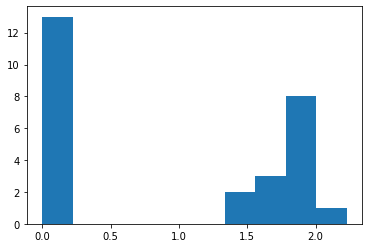

In [13]:
plt.hist(np.exp(full_logits[1207]))

(array([13.,  0.,  0.,  0.,  0.,  0.,  2.,  5.,  6.,  1.]),
 array([1.        , 1.00900489, 1.01800977, 1.02701466, 1.03601955,
        1.04502443, 1.05402932, 1.06303421, 1.07203909, 1.08104398,
        1.09004886]),
 <BarContainer object of 10 artists>)

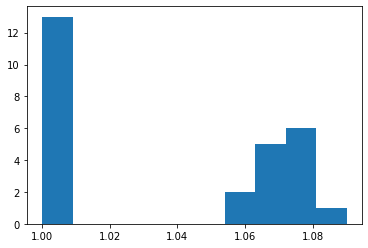

In [14]:
plt.hist(np.exp(full_probs[1207]))

(array([14.,  0.,  0.,  0.,  0.,  1.,  3.,  6.,  1.,  2.]),
 array([1.        , 1.010591  , 1.02118199, 1.03177299, 1.04236399,
        1.05295498, 1.06354598, 1.07413698, 1.08472798, 1.09531897,
        1.10590997]),
 <BarContainer object of 10 artists>)

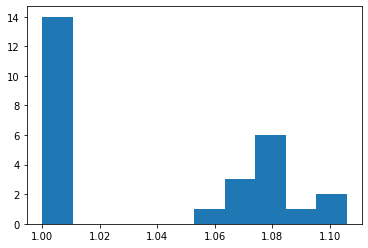

In [30]:
plt.hist(np.exp(full_probs[373]))

(array([16.,  0.,  0.,  0.,  1.,  4.,  5.,  0.,  0.,  1.]),
 array([1.        , 1.01503807, 1.03007613, 1.0451142 , 1.06015227,
        1.07519033, 1.0902284 , 1.10526647, 1.12030453, 1.1353426 ,
        1.15038067]),
 <BarContainer object of 10 artists>)

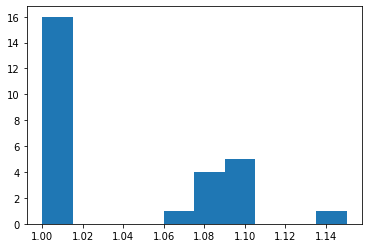

In [31]:
plt.hist(np.exp(full_probs[3834]))

In [36]:
np.mean(entropy(full_probs))

4.247504714937253

In [33]:
np.mean(entropy(full_probs[373]))

3.735708876998053

In [35]:
full_probs_10_20 = np.array(full_probs)[(gt_counts > 10) & (gt_counts <20)]
np.mean(entropy(full_probs_10_20))

4.017563629641373

<BarContainer object of 28 artists>

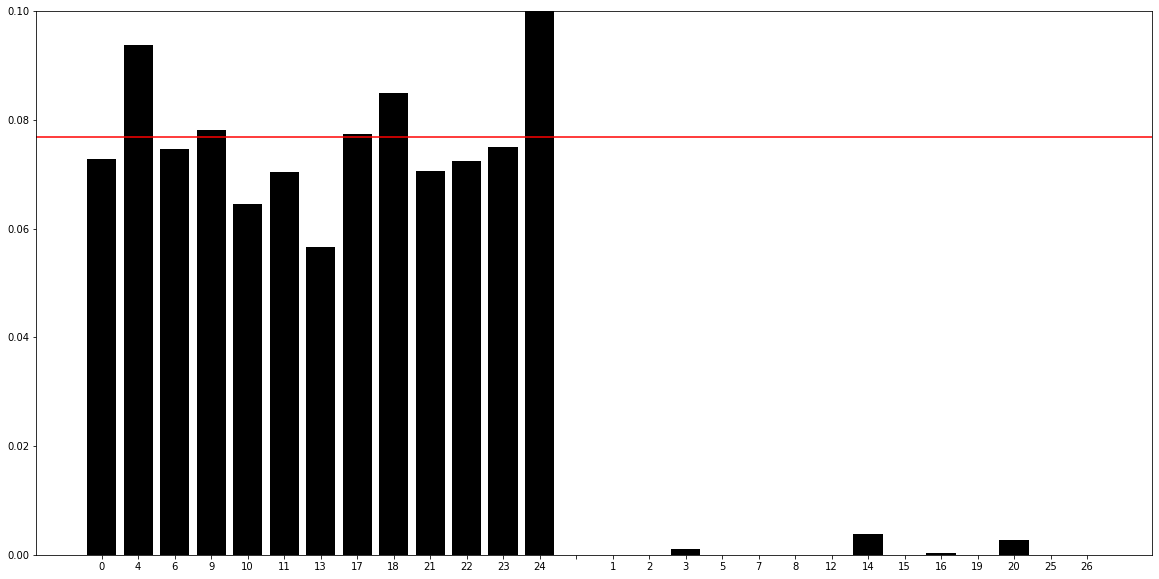

In [32]:
gt_idxs_373 = sorted(game_data['test_gt_idxs'][373])
not_gt_idxs_373 = [i for i in range(27) if not i in gt_idxs_373]

plt.figure(figsize=(20,10))
plt.ylim(0.0, 0.1)

plt.axhline(y=1./gt_counts[373], color='r', linestyle='-')

plt.bar(
    [str(idx) for idx in gt_idxs_373] + [' '] + [str(idx) for idx in not_gt_idxs_373],  
    list(full_probs[373][gt_idxs_373]) + [0] + list(full_probs[373][not_gt_idxs_373]),
    color='k'
)


## Embedding Analysis

In [16]:
%load_ext autoreload
%autoreload 2

from dataset import BatchFetcher
from metrics import find_nn, analogy, find_cos, find_dotproduct, find_euclidean
from dataraw_sampling import construct_card_idx_lookup

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
cuda_device = trainmodule.model._parameters['key_bias_terms'].device

game_data = main.load_data(args.data_path)
batch_fecther = BatchFetcher(
    raw_data = game_data, device=cuda_device)

---------data----------
num_attributes : 3
num_attr_vals : 3
key_support_size : 27
N_pairs : 8
union_only : True
max_len_q : 16
len_k : 1
train_gt_idxs length : 0
val_gt_idxs length : 5120
test_gt_idxs length : 5120
train_tokens length : 0
val_tokens length : 5120
test_tokens length : 5120
test_marginal_gt_idxs length : 5120
test_marginal_tokens length : 5120
vocab_size : 74
symbol_vocab_token_lookup : {'(': 64, ')': 65, 'NULL': 66, 'SEP': 67, 'SOS': 68, 'EOS': 69, 'PAD': 70, 'PLH': 71, '|': 72, '!': 73}
vocab_by_property : False
-----------------------


In [18]:
queries = [[(0,1,3),(0,0,0)], [(0,1,3),(1,2,0)]]
keys = [[(0,0,0)],[(0,1,0)],[(2,2,2)]]
X_query, X_key = batch_fecther.make_query_batch(X_query_properties=queries, X_key_properties=None, X_key=[i for i in range(game_data['key_support_size'])])
query_repr, key_repr = trainmodule.pull_repr(X_query, X_key)

In [19]:
query_repr

tensor([[-19.7519,  35.6086,   5.0255, -17.7699,   8.6467,  70.5677,  33.9191,
         -38.9950,  34.2473,  -4.9137, -16.3174, -40.5935,   2.7974, -42.2480,
         -12.1096,  24.9127,  18.9710,  12.4464,  34.1191,  18.0182],
        [ -7.1161,  36.8920,  16.7436,   5.9949,  25.3385,  52.5164,  21.7190,
         -42.3500,  28.7663,  -9.8225,  -9.9799, -51.1561,  -2.3691, -41.5525,
           7.5428,  15.9594,   7.1586,  27.9930,  44.0406, -24.3900]],
       device='cuda:1')

In [20]:
# Do the linear analogy for keys first
key_repr

tensor([[-1.1923e-01,  8.0438e-02,  1.3100e-01, -1.2329e-01,  2.1626e-01,
         -2.9786e-01, -4.3349e-02,  1.3875e-01,  2.0196e-01, -1.2091e-01,
          2.5397e-01, -8.6874e-02, -1.9173e-02,  1.6440e-01, -1.0652e-01,
          9.3574e-02,  1.5054e-01,  2.0636e-01,  4.8208e-02,  1.7831e-01],
        [-3.3912e-02,  1.6296e-02, -1.0957e-01,  8.9990e-02,  4.1446e-03,
         -4.1776e-02,  1.9676e-01, -1.3556e-01, -1.4074e-01,  1.3625e-01,
          1.8136e-01,  1.8686e-01,  1.5120e-01,  2.5375e-02,  5.9094e-02,
          1.9758e-03, -2.0627e-02, -1.3274e-01, -5.4137e-02,  2.1636e-01],
        [ 5.7918e-02, -1.3114e-01, -9.8616e-02, -9.9070e-02, -7.4149e-02,
         -4.7404e-02,  2.2914e-01,  1.4364e-02,  7.1790e-02,  2.7025e-01,
          2.1369e-01, -1.3577e-01, -1.3647e-01,  8.4216e-02, -2.5054e-02,
         -5.1260e-02,  8.8038e-02, -1.6709e-01, -1.0921e-01, -2.2857e-01],
        [-9.5288e-02, -5.8823e-02,  2.1324e-02, -2.1987e-02,  2.3150e-02,
         -1.2008e-01, -1.0682e-01, 

In [21]:
key_repr_normalized = key_repr / torch.linalg.norm(key_repr, ord=2, dim=-1).view(-1,1)

torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([20])


(array([27., 27.,  0., 27., 27., 81., 27., 27., 54., 81., 54., 54., 81.,
        27.,  0., 27.,  0., 27., 27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 27.]),
 array([-0.16979808, -0.14640211, -0.12300615, -0.09961019, -0.07621423,
        -0.05281827, -0.02942231, -0.00602635,  0.01736962,  0.04076558,
         0.06416154,  0.0875575 ,  0.11095346,  0.13434942,  0.15774539,
         0.18114135,  0.20453731,  0.22793327,  0.25132923,  0.27472519,
         0.29812115,  0.32151712,  0.34491308,  0.36830904,  0.391705  ,
         0.41510096,  0.43849692,  0.46189288,  0.48528885,  0.50868481,
         0.53208077,  0.55547673,  0.57887269,  0.60226865,  0.62566462,
         0.64906058,  0.67245654,  0.6958525 ,  0.71924846,  0.74264442,
         0.76604038,  0.78943635,  0.81283231,  0.83622827,  0.85962423,
         0.88302019,  0.90641615,  0.92981212,  0.95320808,

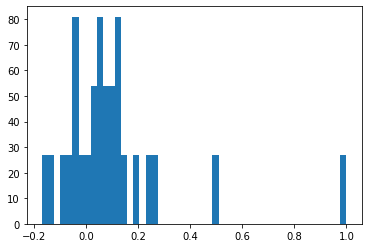

In [27]:
distances = []

for i in range(27):
    nn_idx, nn_dists = find_nn(v=key_repr_normalized[0], Wv=key_repr_normalized, similarity_fn=find_cos, k=27)
    distances += nn_dists.tolist()
    
import matplotlib.pyplot as plt
import numpy as np
plt.hist(distances, bins=50)

In [28]:
np.var(distances), np.mean(distances), np.sum(distances)

(0.04775907871315726, 0.10083536355307808, 73.50898003019392)

In [13]:
card2idx_lookup, idx2card_lookup = construct_card_idx_lookup(game_data['num_attributes'], game_data['num_attr_vals'])


def linear_analogy_by_props(propertiesA, propertiesB, propertiesC, card2idx_lookup, idx2card_lookup):
    keyidxA = card2idx_lookup[propertiesA]
    keyidxB = card2idx_lookup[propertiesB]
    keyidxC = card2idx_lookup[propertiesC]

    print(keyidxA, keyidxB, keyidxC)

    vA = key_repr[keyidxA]
    vB = key_repr[keyidxB]
    vC = key_repr[keyidxC]

    nns_idx, nns_distances = analogy(vA, vB, vC, key_repr, similarity_fn=find_cos, k=None)
    nns_properties = [idx2card_lookup[idx.item()] for idx in nns_idx]
    print(nns_idx, nns_distances)
    print(nns_properties)

In [ ]:
# find a query that 27 got right, but 16 got wrong.



In [14]:
linear_analogy_by_props(
    propertiesA = (2,2,1), 
    propertiesB = (2,2,0), 
    propertiesC = (1,1,1), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

25 24 13
torch.Size([27])
tensor([13, 24, 21, 17,  0,  5, 19,  6, 18,  9, 16, 14, 12,  1, 26, 10,  4, 20,
        15, 22, 23,  2,  3,  8, 11,  7, 25], device='cuda:1') tensor([ 5.9432e-01,  5.2089e-01,  1.8108e-01,  1.7092e-01,  1.5072e-01,
         9.9470e-02,  8.8152e-02,  5.8378e-02,  5.0742e-02,  2.9587e-02,
         2.6836e-02,  2.3646e-02, -3.2075e-04, -9.3897e-03, -3.5618e-02,
        -4.0437e-02, -4.1036e-02, -5.6920e-02, -6.9848e-02, -8.6352e-02,
        -1.0769e-01, -1.0988e-01, -1.1066e-01, -1.4922e-01, -1.7888e-01,
        -1.9084e-01, -5.6350e-01], device='cuda:1')
[(1, 1, 1), (2, 2, 0), (2, 1, 0), (1, 2, 2), (0, 0, 0), (0, 1, 2), (2, 0, 1), (0, 2, 0), (2, 0, 0), (1, 0, 0), (1, 2, 1), (1, 1, 2), (1, 1, 0), (0, 0, 1), (2, 2, 2), (1, 0, 1), (0, 1, 1), (2, 0, 2), (1, 2, 0), (2, 1, 1), (2, 1, 2), (0, 0, 2), (0, 1, 0), (0, 2, 2), (1, 0, 2), (0, 2, 1), (2, 2, 1)]


In [15]:
linear_analogy_by_props(
    propertiesA = (0,2,1), 
    propertiesB = (2,2,1), 
    propertiesC = (0,2,2), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

7 25 8
torch.Size([27])
tensor([ 8, 25,  6, 11,  3,  1, 23, 12, 20, 24, 26, 14, 22, 18,  0, 19,  5, 13,
         9, 15,  4, 10, 16,  2, 17, 21,  7], device='cuda:1') tensor([ 0.5836,  0.5672,  0.1414,  0.1334,  0.0939,  0.0706,  0.0654,  0.0504,
         0.0499,  0.0454,  0.0359,  0.0162,  0.0008, -0.0127, -0.0160, -0.0195,
        -0.0250, -0.0378, -0.0395, -0.0437, -0.0445, -0.0795, -0.1001, -0.1075,
        -0.1169, -0.1456, -0.4116], device='cuda:1')
[(0, 2, 2), (2, 2, 1), (0, 2, 0), (1, 0, 2), (0, 1, 0), (0, 0, 1), (2, 1, 2), (1, 1, 0), (2, 0, 2), (2, 2, 0), (2, 2, 2), (1, 1, 2), (2, 1, 1), (2, 0, 0), (0, 0, 0), (2, 0, 1), (0, 1, 2), (1, 1, 1), (1, 0, 0), (1, 2, 0), (0, 1, 1), (1, 0, 1), (1, 2, 1), (0, 0, 2), (1, 2, 2), (2, 1, 0), (0, 2, 1)]


In [16]:
linear_analogy_by_props(
    propertiesA = (0,2,1), 
    propertiesB = (2,0,1), 
    propertiesC = (2,2,2), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

7 19 26
torch.Size([27])
tensor([19, 26, 24,  0,  5, 21,  6, 13, 12, 10, 20, 23, 22, 14, 25,  2,  1, 11,
         9,  3,  8, 17, 16, 15, 18,  4,  7], device='cuda:1') tensor([ 0.5747,  0.3474,  0.1983,  0.1816,  0.1047,  0.0855,  0.0849,  0.0837,
         0.0797,  0.0752,  0.0469,  0.0442,  0.0374,  0.0358,  0.0024,  0.0024,
        -0.0129, -0.0178, -0.0693, -0.0710, -0.0777, -0.1023, -0.1083, -0.1164,
        -0.1206, -0.1305, -0.5392], device='cuda:1')
[(2, 0, 1), (2, 2, 2), (2, 2, 0), (0, 0, 0), (0, 1, 2), (2, 1, 0), (0, 2, 0), (1, 1, 1), (1, 1, 0), (1, 0, 1), (2, 0, 2), (2, 1, 2), (2, 1, 1), (1, 1, 2), (2, 2, 1), (0, 0, 2), (0, 0, 1), (1, 0, 2), (1, 0, 0), (0, 1, 0), (0, 2, 2), (1, 2, 2), (1, 2, 1), (1, 2, 0), (2, 0, 0), (0, 1, 1), (0, 2, 1)]


In [17]:
linear_analogy_by_props(
    propertiesA = (2,2,1), 
    propertiesB = (2,2,1), 
    propertiesC = (2,2,0), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

25 25 24
torch.Size([27])
tensor([24, 12, 21, 26,  3, 25,  0, 10, 19, 16, 20,  9,  2, 18,  5, 15, 13, 14,
        22,  6,  7,  1, 17, 23,  8, 11,  4], device='cuda:1') tensor([ 1.0000,  0.2161,  0.1985,  0.1738,  0.1074,  0.1002,  0.0873,  0.0781,
         0.0746,  0.0638,  0.0627,  0.0606,  0.0483,  0.0294,  0.0180, -0.0106,
        -0.0149, -0.0169, -0.0192, -0.0278, -0.0422, -0.0437, -0.0440, -0.0567,
        -0.0676, -0.0707, -0.0987], device='cuda:1')
[(2, 2, 0), (1, 1, 0), (2, 1, 0), (2, 2, 2), (0, 1, 0), (2, 2, 1), (0, 0, 0), (1, 0, 1), (2, 0, 1), (1, 2, 1), (2, 0, 2), (1, 0, 0), (0, 0, 2), (2, 0, 0), (0, 1, 2), (1, 2, 0), (1, 1, 1), (1, 1, 2), (2, 1, 1), (0, 2, 0), (0, 2, 1), (0, 0, 1), (1, 2, 2), (2, 1, 2), (0, 2, 2), (1, 0, 2), (0, 1, 1)]


In [18]:
linear_analogy_by_props(
    propertiesA = (0,2,1), 
    propertiesB = (2,0,1), 
    propertiesC = (0,2,2), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

7 19 8
torch.Size([27])
tensor([19,  8,  1,  5,  0,  6, 11, 23, 14, 20, 22, 24, 13, 18, 15, 16, 21, 10,
         3, 12,  4,  2, 17, 25,  9, 26,  7], device='cuda:1') tensor([ 6.2927e-01,  5.0565e-01,  2.5410e-01,  2.0043e-01,  1.6078e-01,
         1.3743e-01,  1.0221e-01,  7.0698e-02,  6.6436e-02,  5.0487e-02,
         3.1856e-02,  2.9084e-02,  4.8149e-04, -1.0118e-02, -1.8662e-02,
        -3.2290e-02, -3.4671e-02, -5.5464e-02, -5.6432e-02, -7.1705e-02,
        -7.2535e-02, -7.8670e-02, -8.0427e-02, -9.1428e-02, -2.0399e-01,
        -2.3895e-01, -5.0795e-01], device='cuda:1')
[(2, 0, 1), (0, 2, 2), (0, 0, 1), (0, 1, 2), (0, 0, 0), (0, 2, 0), (1, 0, 2), (2, 1, 2), (1, 1, 2), (2, 0, 2), (2, 1, 1), (2, 2, 0), (1, 1, 1), (2, 0, 0), (1, 2, 0), (1, 2, 1), (2, 1, 0), (1, 0, 1), (0, 1, 0), (1, 1, 0), (0, 1, 1), (0, 0, 2), (1, 2, 2), (2, 2, 1), (1, 0, 0), (2, 2, 2), (0, 2, 1)]


In [19]:
linear_analogy_by_props(
    propertiesA = (1,0,1), 
    propertiesB = (2,0,1), 
    propertiesC = (1,2,2), 
    card2idx_lookup=card2idx_lookup, 
    idx2card_lookup=idx2card_lookup)

10 19 17
torch.Size([27])
tensor([17, 19,  1,  0, 20,  5, 13, 21, 18,  8, 16, 15, 11, 22, 23,  2, 24, 14,
        12,  6,  7,  4, 26, 25,  9,  3, 10], device='cuda:1') tensor([ 0.6621,  0.4171,  0.2801,  0.1884,  0.1854,  0.1191,  0.1019,  0.0783,
         0.0723,  0.0655,  0.0533,  0.0518,  0.0305,  0.0282, -0.0138, -0.0203,
        -0.0262, -0.0319, -0.0334, -0.0842, -0.0990, -0.1587, -0.1825, -0.2288,
        -0.2484, -0.2989, -0.5968], device='cuda:1')
[(1, 2, 2), (2, 0, 1), (0, 0, 1), (0, 0, 0), (2, 0, 2), (0, 1, 2), (1, 1, 1), (2, 1, 0), (2, 0, 0), (0, 2, 2), (1, 2, 1), (1, 2, 0), (1, 0, 2), (2, 1, 1), (2, 1, 2), (0, 0, 2), (2, 2, 0), (1, 1, 2), (1, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (2, 2, 2), (2, 2, 1), (1, 0, 0), (0, 1, 0), (1, 0, 1)]


In [ ]:
# Look at distance between one card and all the other cards